<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,27.412286,46.801398,92.423944,63.969470,-150.996713,89.610385,822.460258,-732.849873
1,0.0,1.0,76.661005,73.186622,20.651234,48.062840,168.423902,396.985604,-15.439484,412.425088
2,0.0,2.0,70.240065,32.200034,55.815768,41.626617,-778.467810,-568.585325,351.413331,-919.998657
3,0.0,3.0,31.838807,20.523062,51.411806,33.388639,396.483903,543.646218,78.452297,465.193921
4,0.0,4.0,50.854456,96.262142,87.476155,72.226076,4567.247410,4884.066239,1031.161647,3852.904591
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.278922,88.383570,26.281142,44.496712,1071.218740,1315.659086,308.031648,1007.627438
119996,999.0,116.0,55.196619,87.447251,38.866785,49.215708,1557.829372,1798.555736,83.915306,1714.640430
119997,999.0,117.0,20.172836,81.589575,23.250572,35.911883,423.373226,594.298092,-449.598634,1043.896726
119998,999.0,118.0,36.812727,41.847388,98.304347,63.307968,-290.801360,-40.528930,73.333438,-113.862368


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,27.412286,46.801398,92.423944,63.969470,-150.996713,89.610385,822.460258,-732.849873
1,0.0,1.0,76.661005,73.186622,20.651234,48.062840,168.423902,396.985604,-15.439484,412.425088
2,0.0,2.0,70.240065,32.200034,55.815768,41.626617,-778.467810,-568.585325,351.413331,-919.998657
3,0.0,3.0,31.838807,20.523062,51.411806,33.388639,396.483903,543.646218,78.452297,465.193921
4,0.0,4.0,50.854456,96.262142,87.476155,72.226076,4567.247410,4884.066239,1031.161647,3852.904591
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.278922,88.383570,26.281142,44.496712,1071.218740,1315.659086,308.031648,1007.627438
119996,999.0,116.0,55.196619,87.447251,38.866785,49.215708,1557.829372,1798.555736,83.915306,1714.640430
119997,999.0,117.0,20.172836,81.589575,23.250572,35.911883,423.373226,594.298092,-449.598634,1043.896726
119998,999.0,118.0,36.812727,41.847388,98.304347,63.307968,-290.801360,-40.528930,73.333438,-113.862368


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    27.412286  46.801398  92.423944  63.969470  -150.996713   
      1.0    76.661005  73.186622  20.651234  48.062840   168.423902   
      2.0    70.240065  32.200034  55.815768  41.626617  -778.467810   
      3.0    31.838807  20.523062  51.411806  33.388639   396.483903   
      4.0    50.854456  96.262142  87.476155  72.226076  4567.247410   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.278922  88.383570  26.281142  44.496712  1071.218740   
      116.0  55.196619  87.447251  38.866785  49.215708  1557.829372   
      117.0  20.172836  81.589575  23.250572  35.911883   423.373226   
      118.0  36.812727  41.847388  98.304347  63.307968  -290.801360   
      119.0  60.351365  57.647181  63.442650  30.037683   458.973194   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0      89.610385   822.460258  -732.849873  
      1.0     396.985604   -15.439484   412.425088  
      2.0    -568.585325   351.413331  -919.998657  
      3.0     543.646218    78.452297   465.193921  
      4.0    4884.066239  1031.161647  3852.904591  
...                  ...          ...          ...  
999.0 115.0  1315.659086   308.031648  1007.627438  
      116.0  1798.555736    83.915306  1714.640430  
      117.0   594.298092  -449.598634  1043.896726  
      118.0   -40.528930    73.333438  -113.862368  
      119.0   680.452074   244.694861   435.757213  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    27.412286  46.801398  92.423944  63.969470  -150.996713   
      1.0    76.661005  73.186622  20.651234  48.062840   168.423902   
      2.0    70.240065  32.200034  55.815768  41.626617  -778.467810   
      3.0    31.838807  20.523062  51.411806  33.388639   396.483903   
      4.0    50.854456  96.262142  87.476155  72.226076  4567.247410   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.278922  88.383570  26.281142  44.496712  1071.218740   
      116.0  55.196619  87.447251  38.866785  49.215708  1557.829372   
      117.0  20.172836  81.589575  23.250572  35.911883   423.373226   
      118.0  36.812727  41.847388  98.304347  63.307968  -290.801360   
      119.0  60.351365  57.647181  63.442650  30.037683   458.973194   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0      89.610385   822.460258  -732.849873  
      1.0     396.985604   -15.439484   412.425088  
      2.0    -568.585325   351.413331  -919.998657  
      3.0     543.646218    78.452297   465.193921  
      4.0    4884.066239  1031.161647  3852.904591  
...                  ...          ...          ...  
999.0 115.0  1315.659086   308.031648  1007.627438  
      116.0  1798.555736    83.915306  1714.640430  
      117.0   594.298092  -449.598634  1043.896726  
      118.0   -40.528930    73.333438  -113.862368  
      119.0   680.452074   244.694861   435.757213  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,27.412286,46.801398,92.423944,63.969470,-150.996713,89.610385,822.460258,-732.849873
1,0.0,1.0,76.661005,73.186622,20.651234,48.062840,168.423902,396.985604,-15.439484,412.425088
2,0.0,2.0,70.240065,32.200034,55.815768,41.626617,-778.467810,-568.585325,351.413331,-919.998657
3,0.0,3.0,31.838807,20.523062,51.411806,33.388639,396.483903,543.646218,78.452297,465.193921
4,0.0,4.0,50.854456,96.262142,87.476155,72.226076,4567.247410,4884.066239,1031.161647,3852.904591
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.278922,88.383570,26.281142,44.496712,1071.218740,1315.659086,308.031648,1007.627438
119996,999.0,116.0,55.196619,87.447251,38.866785,49.215708,1557.829372,1798.555736,83.915306,1714.640430
119997,999.0,117.0,20.172836,81.589575,23.250572,35.911883,423.373226,594.298092,-449.598634,1043.896726
119998,999.0,118.0,36.812727,41.847388,98.304347,63.307968,-290.801360,-40.528930,73.333438,-113.862368


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    27.412286  46.801398  92.423944  63.969470  -150.996713   
      1.0    76.661005  73.186622  20.651234  48.062840   168.423902   
      2.0    70.240065  32.200034  55.815768  41.626617  -778.467810   
      3.0    31.838807  20.523062  51.411806  33.388639   396.483903   
      4.0    50.854456  96.262142  87.476155  72.226076  4567.247410   
...                ...        ...        ...        ...          ...   
999.0 115.0  75.278922  88.383570  26.281142  44.496712  1071.218740   
      116.0  55.196619  87.447251  38.866785  49.215708  1557.829372   
      117.0  20.172836  81.589575  23.250572  35.911883   423.373226   
      118.0  36.812727  41.847388  98.304347  63.307968  -290.801360   
      119.0  60.351365  57.647181  63.442650  30.037683   458.973194   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0      89.610385   822.460258  -732.849873  
      1.0     396.985604   -15.439484   412.425088  
      2.0    -568.585325   351.413331  -919.998657  
      3.0     543.646218    78.452297   465.193921  
      4.0    4884.066239  1031.161647  3852.904591  
...                  ...          ...          ...  
999.0 115.0  1315.659086   308.031648  1007.627438  
      116.0  1798.555736    83.915306  1714.640430  
      117.0   594.298092  -449.598634  1043.896726  
      118.0   -40.528930    73.333438  -113.862368  
      119.0   680.452074   244.694861   435.757213  

[120000 rows x 8 columns]

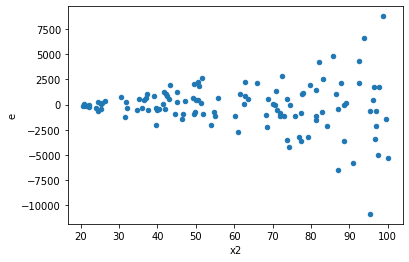

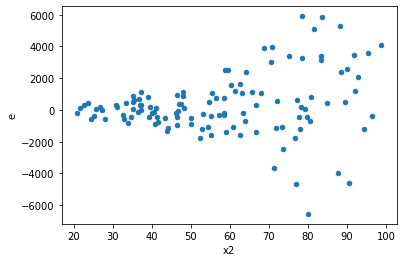

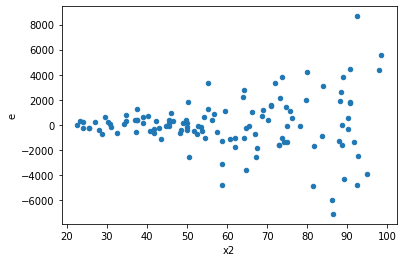

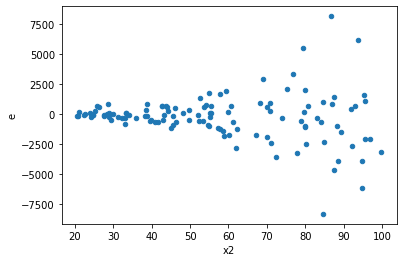

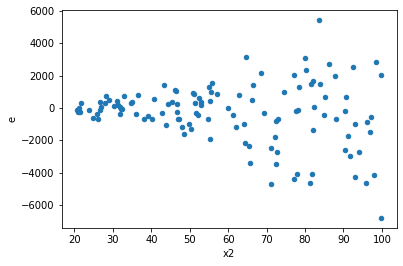

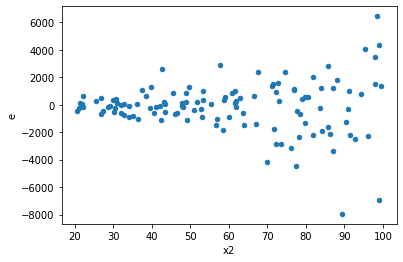

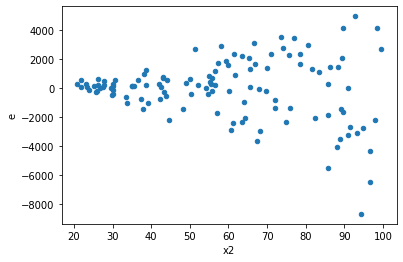

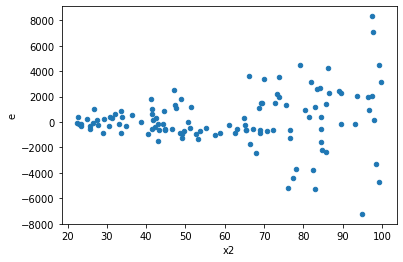

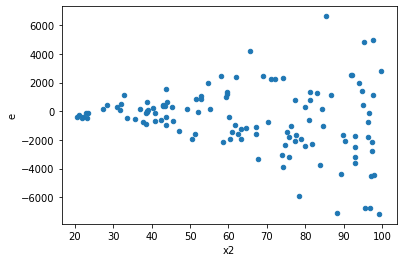

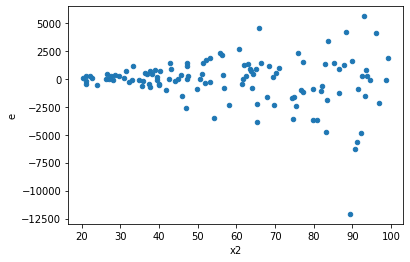

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,152731588.92792365,251728647.83391544,3471172.4756346284,5721105.632588987,1.6481767105343872,0.10112499194996905,0.9494375040250155,0.05056249597498452,Reject005=1 : Homoscedasticity
3.0,44.0,44.0,36208321.95636873,331209307.75170195,822916.4080992893,7527484.267084136,9.147325527838916,1.915756442372185e-11,0.9999999999904212,9.578782211860926e-12,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,62787233.204880685,287574565.6556502,1426982.5728381975,6535785.583082959,4.580143939728434,1.5493093434848504e-06,0.9999992253453283,7.746546717424252e-07,Reject005=0 : Heteroscedasticity
7.0,44.0,44.0,95789271.25522155,303449215.12858075,2177028.892164126,6896573.071104108,3.1678831162632894,0.0002113378586541259,0.9998943310706729,0.00010566892932706295,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,145168593.3594995,224839803.75804138,3299286.212715898,5109995.539955486,1.5488185051241894,0.15068429862795618,0.9246578506860219,0.07534214931397809,Reject005=1 : Homoscedasticity
11.0,44.0,44.0,31131443.688794143,286191789.2078264,707532.8111089579,6504358.845632418,9.193013728137574,1.752464839910317e-11,0.9999999999912377,8.762324199551585e-12,Reject005=0 : Heteroscedasticity
17.0,44.0,44.0,33114988.463019557,396954929.0816697,752613.3741595354,9021702.933674311,11.987167971535321,1.3455903058456897e-13,0.9999999999999327,6.727951529228449e-14,Reject005=0 : Heteroscedasticity
20.0,44.0,44.0,113341380.23880409,283527239.35948324,2575940.4599728202,6443800.89453371,2.5015333213880653,0.002944306544804265,0.9985278467275979,0.0014721532724021325,Reject005=0 : Heteroscedasticity
21.0,44.0,44.0,102017044.22679907,192633855.32774526,2318569.186972706,4378042.166539665,1.888251681743411,0.037606626417132416,0.9811966867914338,0.018803313208566208,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,152731588.92792365,251728647.83391544,3471172.4756346284,5721105.632588987,1.6481767105343872,0.10112499194996905,Reject005=1 : Homoscedasticity
1.0,44.0,44.0,442355977.58155555,46087757.896936916,10053544.945035353,1047449.0431122027,0.10418703540281625,8.074921299313397e-12,Reject005=0 : Heteroscedasticity
2.0,44.0,44.0,354922292.7705306,155677613.25258774,8066415.744784786,3538127.5739224483,0.4386245001331563,0.007341450016949308,Reject005=0 : Heteroscedasticity
3.0,44.0,44.0,36208321.95636873,331209307.75170195,822916.4080992893,7527484.267084136,9.147325527838916,1.915756442372185e-11,Reject005=0 : Heteroscedasticity
4.0,44.0,44.0,363020858.97741944,192274206.2088477,8250474.067668623,4369868.322928357,0.529650573662511,0.037640225964274195,Reject005=0 : Heteroscedasticity
5.0,44.0,44.0,62787233.204880685,287574565.6556502,1426982.5728381975,6535785.583082959,4.580143939728434,1.5493093434848504e-06,Reject005=0 : Heteroscedasticity
6.0,44.0,44.0,174872187.43131503,140686591.3197015,3974367.8961662506,3197422.5299932156,0.8045109596113407,0.4735924062095848,Reject005=1 : Homoscedasticity
7.0,44.0,44.0,95789271.25522155,303449215.12858075,2177028.892164126,6896573.071104108,3.1678831162632894,0.0002113378586541259,Reject005=0 : Heteroscedasticity
8.0,44.0,44.0,145168593.3594995,224839803.75804138,3299286.212715898,5109995.539955486,1.5488185051241894,0.15068429862795618,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    692
Reject005=1 : Homoscedasticity      308
Name: Result_test, dtype: int64